In [2]:
import eegPinelineDesign
import numpy as np
import random
import mne
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import re
import json
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA,FastICA
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from scipy.fftpack import fft,ifft
import math
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from scipy.signal import spectrogram,find_peaks_cwt
from mne.preprocessing.ica import ICA
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
import pywt
import itertools

In [3]:
eegPinelineDesign.change_file_directory('C:/Users/ning/Downloads/training set')
EDFfiles, Annotationfiles = eegPinelineDesign.split_type_of_files()
#file_to_read, fileName = eegPinelineDesign.pick_sample_file(EDFfiles,n=1)
#print(fileName)

['64chlocs.elp', 'label_extraction.npy', 'label_extraction.pkl', 's5d2_final.edf', 's5d2_final_annotations.txt', 's6n2_final.edf', 's6n2_final_annotations.txt', 'Sleep Stage Scoring Criteria.docx', 'suj10_d1final.edf', 'suj10_d1final_annotations.txt', 'suj10_d2final.edf', 'suj10_d2final_annotations.txt', 'suj13_l2nap_day2 edited.edf', 'suj13_l2nap_day2 edited1.edf', 'suj13_l2nap_day2 edited1_annotations.txt', 'suj13_l2nap_day2 edited_annotations.txt', 'suj13_l2nap_day2 edited_C3.txt', 'suj13_l2nap_day2 edited_C4.txt', 'suj13_l2nap_day2 edited_F3.txt', 'suj13_l2nap_day2 edited_F4.txt', 'suj13_l2nap_day2 edited_O1.txt', 'suj13_l2nap_day2 edited_O2.txt', 'suj5_d1final.edf', 'suj5_d1final_annotations.txt', 'suj6_d1final.edf', 'suj6_d1final_annotations.txt', 'suj8_d1final.edf', 'suj8_d1final_annotations.txt', 'suj8_d2final.edf', 'suj8_d2final_annotations.txt', 'suj9_d1final.edf', 'suj9_d1final_annotations.txt', 'suj9_d2final.edf', 'suj9_d2final_annotations.txt', 'testing-montage-2.mtg', 'Tr

In [54]:
channelList = ['F3','F4','C3','C4','O1','O2','ROC','LOC']

In [55]:
file_to_read, fileName = eegPinelineDesign.pick_sample_file(EDFfiles,n=2)

In [56]:
raw = eegPinelineDesign.load_data(file_to_read,channelList,None, None)

Extracting edf Parameters from suj10_d1final.edf...
Setting channel info structure...
Creating Raw.info structure...
Reading 0 ... 3601999  =      0.000 ...  3601.999 secs...
[done]
Ready.
Fitting ICA to data using 8 channels. 
Please be patient, this may take some time
Inferring max_pca_components from picks.
Using all PCA components: 8
    Searching for artifacts...
    found 2 artifacts by EOG 00
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    2, 7, 4, 4, 2
    Removing duplicate indices...
Ready.
Transforming to ICA space (8 components)
Zeroing out 3 ICA components
Inverse transforming to PCA space
Reconstructing sensor space signals from 8 PCA components


In [57]:
annotation_to_read = [x for x in Annotationfiles if fileName in x]
file = pd.read_csv(annotation_to_read[0])

In [58]:
windowsLabel = eegPinelineDesign.annotation_to_labels(Annotationfiles,fileName)

In [59]:
TrainingLabel=[]
for items in windowsLabel:
    if items == 'w':
        TrainingLabel.append(0)
    elif items == '1':
        TrainingLabel.append(1)
    elif items == '2':
        TrainingLabel.append(2)
    elif items == '3':
        TrainingLabel.append(3)


In [65]:
channelList = ['F3','F4','C3','C4','O1','O2']
raw.pick_channels(channelList)
raw.ch_names

['F3', 'F4', 'C3', 'C4', 'O1', 'O2']

In [66]:

TrainingData = {}
for index,chan_names in enumerate(raw.ch_names):
    TrainingData[chan_names]=[]
    for sample in range(len(TrainingLabel)):
        try:
            startPoint = 30*sample
            endPoint = 30*(sample+1)
            start,stop=raw.time_as_index([startPoint,endPoint])
            tempsegment,timespan=raw[index,start:stop]
            cA,cD = pywt.dwt(tempsegment,'db1',mode=pywt.MODES.periodic)
            if len(cA[0]) == 15000:
                TrainingData[chan_names].append(list(cA[0]))
            else:
                pass
        except:
            TrainingData[chan_names].append(cA)

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: MODES has been renamed to Modes and will be removed in a future version of pywt.


In [74]:
#clf = LogisticRegression(penalty='l1',tol=1e-9,C=0.7,max_iter=10e5,
#                        multi_class='ovr')
clf = OneVsRestClassifier(SVC(kernel='linear',tol=1e-9,max_iter=-1))

c:\anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: MODES has been renamed to Modes and will be removed in a future version of pywt.


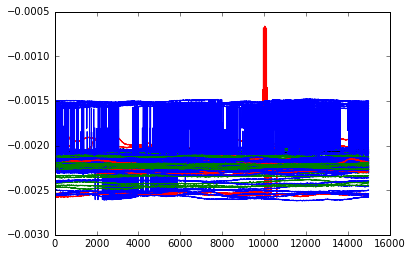

In [70]:
for sample in range(len(Y[:-1])):
#sample = 15
    startPoint=30*sample;endPoint=30*(sample+1)
    start,stop=raw.time_as_index([startPoint,endPoint])
    tempsegment,timespan=raw[5,start:stop]

    coeffs=pywt.dwt(tempsegment,'db1',pywt.MODES.periodic)
    colors = ['red','blue','green','black']
    cA,cD = coeffs
    #print(TrainingLabel[sample])
    plt.plot(cA[0],colors[Y[sample]])

In [75]:
from sklearn.cross_decomposition import CCA
X = np.array(TrainingData['O2'])
#X = PCA(n_components=50).fit_transform(X)
Y = np.array(TrainingLabel)


In [76]:
clf.fit(X,Y[:-1])

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=1e-09, verbose=False),
          n_jobs=1)

In [77]:
print(classification_report(clf.predict(X),Y[:-1]))
print(clf.score(X,Y[:-1]))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.52      0.68       120
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0

avg / total       1.00      0.52      0.68       120

0.516666666667


c:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [78]:
print('predict:',clf.predict(X),'\nacutal: ',Y[:-1])

predict: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1] 
acutal:  [0 0 0 1 0 0 1 1 1 1 2 2 2 1 1 2 2 1 2 1 1 0 2 0 2 2 2 1 1 1 2 1 2 1 2 2 2
 1 2 2 2 2 1 2 2 2 1 0 2 2 1 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1
 2 2 2 2 2 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 2
 1 1 2 1 2 2 2 2 2]
